# Error surface of a single input neuron
Applying a linear or sigmoid activation function in a single input neuron

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

import numpy as np
import math

from scipy import ndimage
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

## Definition of an objective function (loss)

In [2]:
def objective_function(neuron_output, train_output): 
    E = 0.5 * (neuron_output - train_output)**2
    return E

## Definition of neuron output function

In [3]:
def sigmoid(z):
    y = (1/(1+math.exp(-z)))
    return y

In [4]:
def linear_activation(z, 
                      factor = 0.5):
    y = factor * z
    return y

## Definition of single input neuron

In [5]:
def single_input_neuron_function(bias, 
                                 weight, 
                                 input_value=0.7, 
                                 activation = 'linear'): 
    #Intermediate state: z
    z = input_value * weight + bias
    
    #Activation function
    if activation == 'linear':
        y = linear_activation(z)
    elif activation == 'sigmoid':
        y = sigmoid(z)
    else: 
        print('Activation function not implemented!')
        exit()
    return y

## Variation of neuron parameters
With a given neuron input value, a neuron's output is variied in two dimensions according to its bias and weight. 
Those parameters are varyied during training through backpropagation.

In [6]:
# 1st dimension: bias
bias = np.arange(-40., 40., 2)

# 2nd dimension: weight
weight = np.arange(-40., 40., 2)

# 2D arrays
X, Y = np.meshgrid(bias, weight)
print('Bias matrix: {}'.format(X.shape))
print('Weight matrix: {}'.format(Y.shape))

# 3rd dimension: error
error = np.zeros((bias.shape[0], weight.shape[0]))

Bias matrix: (40, 40)
Weight matrix: (40, 40)


## Neuron output by mapping from default input to output

In [7]:
for b_idx, b in enumerate(bias): 
    for w_idx, w in enumerate(weight): 
        error[b_idx, w_idx] = objective_function(single_input_neuron_function(b, w), train_output = 0.3)
    
print('Error matrix: {}'.format(error.shape))

Error matrix: (40, 40)


/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':
/home/paul/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


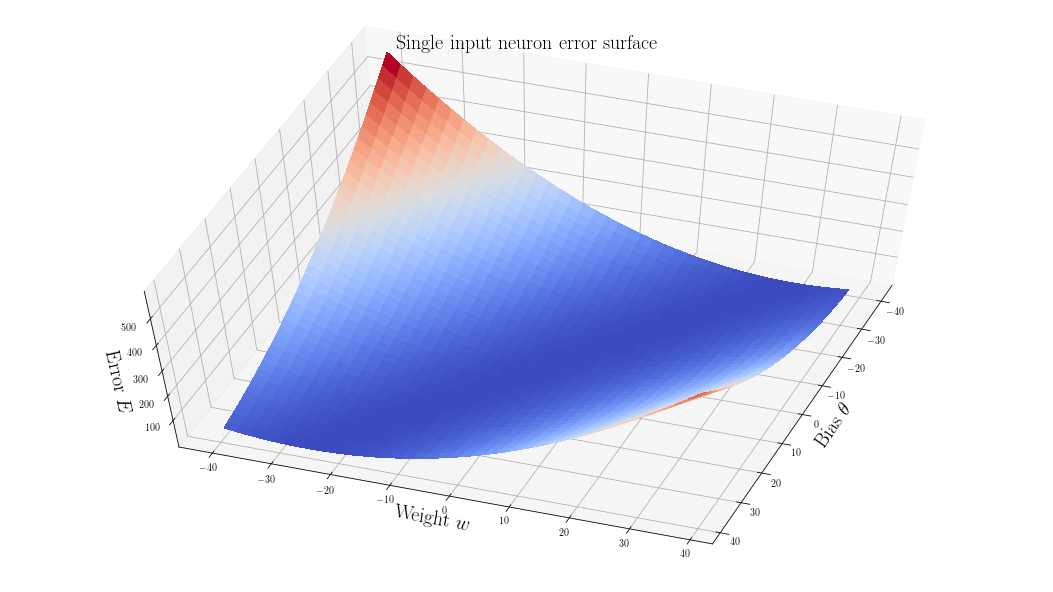

In [8]:
# Set figure
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)

# Plot current figure
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, error, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Set labels and plot properties
ax.set_xlabel(r'Bias $\theta$', fontsize=20)
ax.set_ylabel(r'Weight $w$', fontsize=20)
ax.set_zlabel(r'Error $E$', fontsize=20)

# Rotation
ax.view_init(60, 20)
plt.title(r"Single input neuron error surface", fontsize=20, color='black')

# Plot
plt.show()

In [ ]:
# Save current figure
fig.savefig('single_input_neuron_error_surface.eps', format='eps', dpi=1000)